In [46]:
# Importing of libraries
import pandas as pd
import numpy as np
from __future__ import print_function
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
df= pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [48]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [49]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [50]:
df.shape

(2200, 8)

In [51]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [52]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [53]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

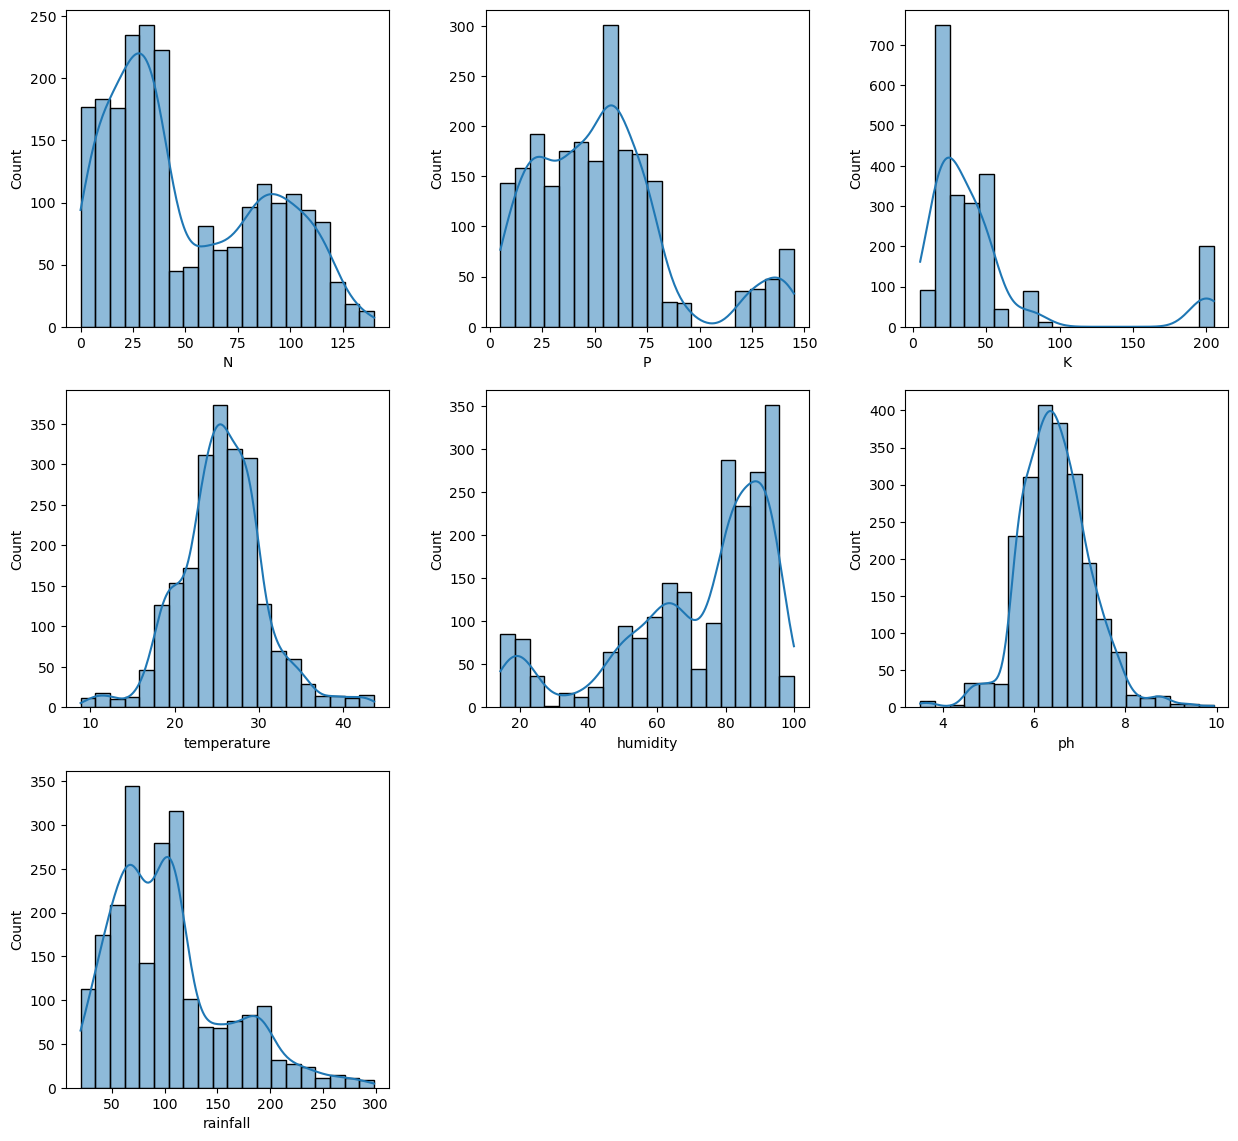

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 14))
n = 0  
for x in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.3)
    sns.histplot(df[x], bins=20, kde=True)  # kde=True adds a density plot
plt.show()


In [55]:
def get_region(row):
    if row['ph'] >= 5.0 and row['ph'] <= 6.5 and row['temperature'] >= 20 and row['temperature'] <= 22.5 and row['rainfall'] >= 150 and row['rainfall'] <= 250:
        return 'Northern India'
    elif row['ph'] >= 5.2 and row['ph'] <= 7.5 and row['temperature'] >= 22.5 and row['temperature'] <= 25 and row['rainfall'] >= 150 and row['rainfall'] <= 250:
        return 'North Eastern India'
    elif row['ph'] >= 5.2 and row['ph'] <= 7.5 and row['temperature'] >= 25 and row['temperature'] <= 27.5 and row['rainfall'] >= 100 and row['rainfall'] <= 150:
        return 'Eastern India' 
    elif row['ph'] >= 6.5 and row['ph'] <= 8.4 and row['temperature'] >= 25 and row['temperature'] <= 27.5 and row['rainfall'] >= 100 and row['rainfall'] <= 150:
        return 'Central India'
    elif row['ph'] >= 6.5 and row['ph'] <= 8.4 and row['temperature'] >= 25 and row['temperature'] <= 27.5 and row['rainfall'] >= 150 and row['rainfall'] <= 250:
        return 'Western India'
    elif row['ph'] >= 5.2 and row['ph'] <= 7.5 and row['temperature'] > 27.5 and row['temperature'] >= 50 and row['rainfall'] <= 100:
        return 'Southern India'
    else:
        return 'Other'
        
    return location
df['region'] = df.apply(get_region, axis=1)

In [56]:
df = pd.get_dummies(df, columns=['region'], prefix=['region'])
df

,N,P,K,temperature,humidity,ph,rainfall,label,region_Central India,region_Eastern India,region_North Eastern India,region_Northern India,region_Other,region_Western India
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,False,False,False,False,False,True
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,False,False,False,False,False,True
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,False,True,False,False,False,False
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,False,False,True,False,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,False,True,False,False,False,False


In [57]:

features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [58]:
acc = []
model = []

In [59]:

# Now, split the dataset
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)

print("Dataset successfully split!")


Dataset successfully split!


In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

Y_pred = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, Y_pred)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,Y_pred))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [63]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [64]:
import pickle
import os

# Define the file path
DT_pkl_filename = '../models/DecisionTree.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(DT_pkl_filename), exist_ok=True)

# Open the file to save the model
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(DecisionTree, DT_Model_pkl)

print(f"Model saved successfully at {DT_pkl_filename}")


Model saved successfully at ../models/DecisionTree.pkl


In [65]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=None)
RandomForest.fit(Xtrain, Ytrain)

Y_pred = RandomForest.predict(Xtest)

accuracy = accuracy_score(Ytest, Y_pred)
print('Accuracy:', accuracy * 100)
acc.append(accuracy)
model.append('Random Forest')

report = classification_report(Ytest, Y_pred)
print('Classification report:\n', report)

Accuracy: 99.54545454545455
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      

In [66]:
from sklearn.model_selection import cross_val_score
# Cross validation score (RandomForest)
score = cross_val_score(RandomForest, features, target,cv=5)
score

array([0.99772727, 0.99318182, 0.99772727, 0.99545455, 0.98863636])

In [67]:
import pickle
import os

# Define the file path for saving
RF_pkl_filename = '../models/RandomForest.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(RF_pkl_filename), exist_ok=True)

# Save the trained model using pickle
with open(RF_pkl_filename, 'wb') as RF_Model_pkl:
    pickle.dump(RandomForest, RF_Model_pkl)

print(f"Random Forest model saved successfully at {RF_pkl_filename}")


Random Forest model saved successfully at ../models/RandomForest.pkl


In [68]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

Y_pred = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, Y_pred)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,Y_pred))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [69]:
from sklearn.model_selection import cross_val_score
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes, features, target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

Classifier = MLPClassifier(hidden_layer_sizes=(30, 20), activation="relu", 
                           max_iter=300, solver='adam', learning_rate='constant')
Classifier.fit(X_train_scaled, Ytrain)

Y_pred = Classifier.predict(X_test_scaled)
nn_testing_acc = metrics.accuracy_score(Ytest, Y_pred)
# acc.append(testing_acc)
# model.append('MLPClassifier')
print("MLPClassifier Accuracy: ", nn_testing_acc*100)

acc.append(nn_testing_acc)
model.append('MLP Classifier')

report = classification_report(Ytest, Y_pred)
print('Classification report:\n', report)


MLPClassifier Accuracy:  97.72727272727273
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      0.96      0.98        23
      orange  

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Classifier)
score = cross_val_score(Classifier, features, target,cv=5)
score

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.95909091, 0.96590909, 0.96590909, 0.96818182, 0.95      ])

In [72]:
import pickle
import os

# Define the file path for saving
MLP_pkl_filename = "../models/MLPClassifier.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(MLP_pkl_filename), exist_ok=True)

# Save the trained model using pickle
with open(MLP_pkl_filename, 'wb') as MLP_Model_pkl:
    pickle.dump(Classifier, MLP_Model_pkl)

print(f"MLPClassifier model saved successfully at {MLP_pkl_filename}")


MLPClassifier model saved successfully at ../models/MLPClassifier.pkl


In [73]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [74]:
from sklearn.model_selection import cross_val_score
# Cross validation score (SWM)
score = cross_val_score(SVM, features, target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [75]:
import pickle
import os

# Define the file path for saving
SVM_pkl_filename = "../models/SVM_Model.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(SVM_pkl_filename), exist_ok=True)

# Save the trained model using pickle
with open(SVM_pkl_filename, 'wb') as SVM_Model_pkl:
    pickle.dump(SVM, SVM_Model_pkl)

print(f"SVM model saved successfully at {SVM_pkl_filename}")


SVM model saved successfully at ../models/SVM_Model.pkl


In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22, weights='distance', algorithm='auto')
knn.fit(Xtrain,Ytrain)

Y_pred = knn.predict(Xtest)
knn_testing_acc = metrics.accuracy_score(Ytest, Y_pred)
print("KNN Accuracy: ", knn_testing_acc*100)

acc.append(knn_testing_acc)
model.append('KNN')

report = classification_report(Ytest, Y_pred)
print('Classification report:\n', report)

KNN Accuracy:  96.81818181818181
Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.81      0.89      0.85        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00 

In [77]:
from sklearn.model_selection import cross_val_score
# Cross validation score (K Nerest Neighbour)
score = cross_val_score(knn, features, target,cv=5)
score

array([0.97272727, 0.96818182, 0.97954545, 0.96363636, 0.97045455])

In [78]:
import pickle
import os

# Define the file path for saving
KNN_pkl_filename = "../models/KNN_Model.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(KNN_pkl_filename), exist_ok=True)

# Save the trained model using pickle
with open(KNN_pkl_filename, 'wb') as KNN_Model_pkl:
    pickle.dump(knn, KNN_Model_pkl)

print(f"KNN model saved successfully at {KNN_pkl_filename}")


KNN model saved successfully at ../models/KNN_Model.pkl


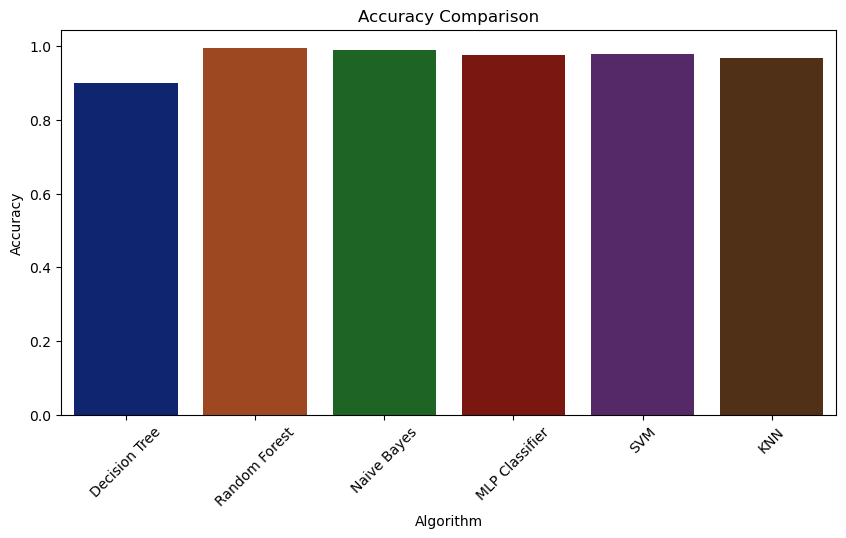

In [79]:
plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

sns.barplot(x=model, y=acc, palette='dark')  # Swapped x and y

plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


In [80]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Random Forest --> 0.9954545454545455
Naive Bayes --> 0.990909090909091
MLP Classifier --> 0.9772727272727273
SVM --> 0.9795454545454545
KNN --> 0.9681818181818181


In [81]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RandomForest.predict(data)
print(prediction)

['coffee']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\ADITH\OneDrive\Desktop\mini vscode


In [83]:
import pickle

# Save with an absolute path
model_path = r"c:\Users\ADITH\OneDrive\Desktop\mini vscode\random_forest_model.pkl"
with open(model_path, "wb") as model_file:
    pickle.dump(RandomForest, model_file)

print(f"Model saved at: {model_path}")


Model saved at: c:\Users\ADITH\OneDrive\Desktop\mini vscode\random_forest_model.pkl


In [84]:
sample = df.groupby('label')[['region_Central India', 'region_Eastern India', 'region_North Eastern India', 'region_Northern India', 'region_Western India','region_Other']].sum()
sample

,region_Central India,region_Eastern India,region_North Eastern India,region_Northern India,region_Western India,region_Other
label,,,,,,
apple,0,0,0,0,0,100
banana,0,33,0,0,0,67
blackgram,0,0,0,0,0,100
chickpea,0,0,0,0,0,100
coconut,0,16,0,0,0,84
coffee,0,20,21,0,22,37
cotton,0,0,0,0,0,100
grapes,0,0,0,0,0,100
jute,0,0,52,0,29,19


In [90]:
print(type(Ytest), type(Y_pred))
print(Ytest[:5], Y_pred[:5])  # Check first 5 values


<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
Name: label, dtype: object ['coffee' 'pomegranate' 'pomegranate' 'cotton' 'mungbean']


Class Labels: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

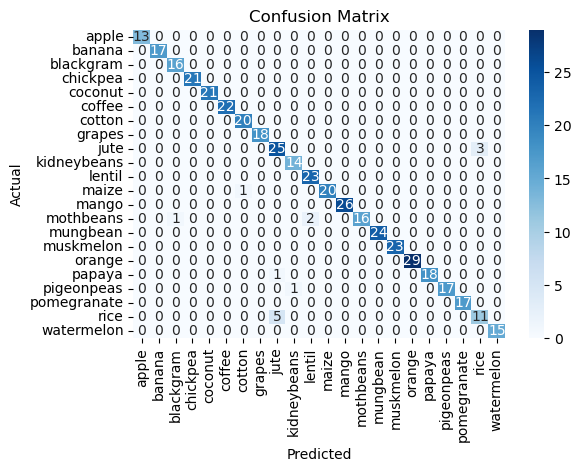

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Ytest,Y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))

import numpy as np

class_labels = np.unique(Ytest)  # Gets unique class names from the dataset
print("Class Labels:", class_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
import joblib
model = joblib.load(r'\Users\ADITH\OneDrive\Desktop\mini project\mini vscode\models\RandomForest.pkl')  # or your correct path

# Try a test prediction with 7 values
prediction = model.predict([[90, 40, 50, 6.5, 200, 27, 80]])
print("Prediction:", prediction)

Prediction: ['papaya']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
import joblib
model = joblib.load(r'\Users\ADITH\OneDrive\Desktop\mini project\mini vscode\models\RandomForest.pkl')  # or your correct path

prediction = model.predict([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
print(prediction)

['coffee']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
